## Importing the required module and Loading the dataset.

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('mutagenicity_data.csv')

# Display the first few rows of the dataset
print(data.head())


   Unnamed: 0  Id       CAS                     SMILES    Status  \
0           0   1  100-00-5   O=[N+]([O-])c1ccc(cc1)Cl  Training   
1           1   2  100-01-6    O=[N+]([O-])c1ccc(N)cc1  Training   
2           2   3  100-02-7    O=[N+]([O-])c1ccc(O)cc1  Training   
3           3   4  100-11-8  O=[N+]([O-])c1ccc(cc1)CBr  Training   
4           4   5  100-12-9   O=[N+]([O-])c1ccc(cc1)CC  Training   

   Experimental value Predicted value  NumValenceElectrons       qed   TPSA  \
0                   1               1                   52  0.463602  43.14   
1                   1               1                   52  0.359544  69.16   
2                   0               1                   52  0.470728  63.37   
3                   1               0                   58  0.432586  43.14   
4                   0               0                   58  0.479785  43.14   

     MolMR  BalabanJ     BertzCT    MolWt  MolLogP  
0  38.1064  3.003401  244.429658  157.556   2.2482  
1  37.5088

In [46]:
print(data.columns)

Index(['Unnamed: 0', 'Id', 'CAS', 'SMILES', 'Status', 'Experimental value',
       'Predicted value', 'NumValenceElectrons', 'qed', 'TPSA', 'MolMR',
       'BalabanJ', 'BertzCT', 'MolWt', 'MolLogP'],
      dtype='object')


In [47]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5764 non-null   int64  
 1   Id                   5764 non-null   int64  
 2   CAS                  5764 non-null   object 
 3   SMILES               5764 non-null   object 
 4   Status               5764 non-null   object 
 5   Experimental value   5764 non-null   int64  
 6   Predicted value      5764 non-null   object 
 7   NumValenceElectrons  5764 non-null   int64  
 8   qed                  5764 non-null   float64
 9   TPSA                 5764 non-null   float64
 10  MolMR                5764 non-null   float64
 11  BalabanJ             5764 non-null   float64
 12  BertzCT              5764 non-null   float64
 13  MolWt                5764 non-null   float64
 14  MolLogP              5764 non-null   float64
dtypes: float64(7), int64(4), object(4)
mem

## Removing the invalid columns

In [48]:
data = data.drop(data.columns[[0,1,2,3,4,6,13]], axis=1)  # Removes columns at index 1 and 3
data.columns

Index(['Experimental value', 'NumValenceElectrons', 'qed', 'TPSA', 'MolMR',
       'BalabanJ', 'BertzCT', 'MolLogP'],
      dtype='object')

## Splitting the data into the feature and feature to be trianed

In [51]:
X = data.drop(columns=["Experimental value"])
y = data["Experimental value"] 

## Finding the correlation in the data

In [52]:
data.corr()

,Experimental value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolLogP
Experimental value,1.000000,-0.010744,-0.143388,0.065954,0.028477,-0.064472,0.171867,0.057119
NumValenceElectrons,-0.010744,1.000000,-0.199546,0.604660,0.961815,-0.445799,0.805632,0.418071
qed,-0.143388,-0.199546,1.000000,-0.215041,-0.187520,-0.063217,-0.208133,-0.082789
TPSA,0.065954,0.604660,-0.215041,1.000000,0.441035,-0.072662,0.450214,-0.281503
MolMR,0.028477,0.961815,-0.187520,0.441035,1.000000,-0.514160,0.865409,0.595573
BalabanJ,-0.064472,-0.445799,-0.063217,-0.072662,-0.514160,1.000000,-0.559053,-0.334763
BertzCT,0.171867,0.805632,-0.208133,0.450214,0.865409,-0.559053,1.000000,0.534178
MolLogP,0.057119,0.418071,-0.082789,-0.281503,0.595573,-0.334763,0.534178,1.000000


# Data Visualisation

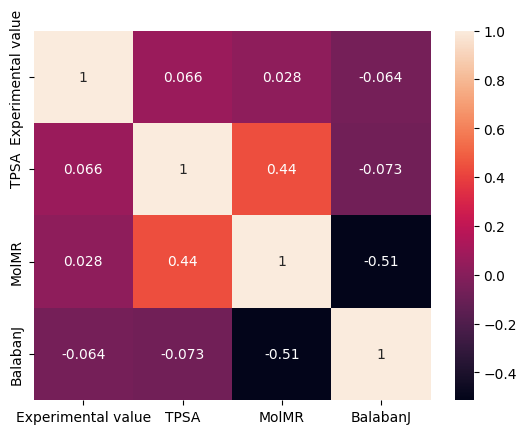

In [53]:
heatmap = sns.heatmap(data[["Experimental value","TPSA","MolMR","BalabanJ"]].corr(),annot=True)

## Finding the nearest neighbours

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}  
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='f1') 
knn_cv.fit(X_train, y_train)
# Best hyperparameter
best_k = knn_cv.best_params_['n_neighbors']
print(f'Optimal number of neighbors: {best_k}')

Optimal number of neighbors: 13


## Model Evaluation

In [55]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=np.int64(13))

## Evaluation of model on different metrices

In [56]:
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 70.86
F1-score: 0.74
Precision: 73.5736
Recall: 0.7538


## Final Report

In [57]:
# Print classification report
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       503
           1       0.74      0.75      0.74       650

    accuracy                           0.71      1153
   macro avg       0.70      0.70      0.70      1153
weighted avg       0.71      0.71      0.71      1153

[[327 176]
 [160 490]]


## Plotting the final result

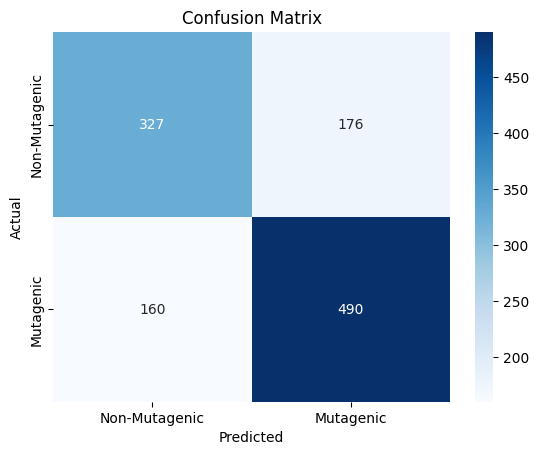

In [58]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Mutagenic', 'Mutagenic'], yticklabels=['Non-Mutagenic', 'Mutagenic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()